# Clustering of a dataset on student depression

# Набір даних

Посилання на датасет: https://www.kaggle.com/datasets/hopesb/student-depression-dataset

Початковий набір даних має 18 атрибутів (їх кількість буде зменшена під час Feature Engineering):

* ID: Унікальний id кожного студента;

* Age: Вік студента;

* Gender: Гендерна приналежність (Male/Female);

* City: Місто, в якому проживає студент;

* CGPA: Середній бал або інші академічні бали;

* Sleep Duration: Середньодобова тривалість сну;

* Profession: Професія (здебільшого це Студент);

* Work Pressure: Робоче навантаження;

* Academic Pressure: Академічне навантаження;

* Study Satisfaction: Задоволення навчальним процесом;

* Job Satisfaction: Задоволення робочим процесом;

* Dietary Habits: Звички щодо їжі;

* Degree: Навчальний ступінь;

* Have you ever had suicidal thoughts ?: Чи були колись суїцидальні думки;

* Work/Study Hours: Робочі/Навчальні години;

* Financial Stress: Стрес спричинений фінансовим положенням;

* Family History of Mental Illness: Сімейна історія психічних захворювань;

* Depression: Наявність дипресії.

Кількість елементів: 27901 (їх кількість буде зменшена у процесі обробки).

# Introduction

Імпортування необхідних бібліотек.

In [1]:
!pip install pyclustering

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 17.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395099 sha256=5f610c3bf4765d78ad897681cfd53c0322711dd77b97c8c4e86109c318f4f009
  Stored in directory: /root/.cache/pip/wheels/b5/42/97/11eee99f5c1e4fdfc170f0a54f9c9eb195df66edb4cf69f449
Successfully built pyclustering


In [2]:
import warnings


import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


from google.colab import drive
from pyclustering.cluster.clique import clique, clique_visualizer
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, LabelEncoder, KBinsDiscretizer


warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

Підключення до Google Drive.

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


Завантаження набору даних з Google Drive.

In [4]:
file_path = '/content/drive/My Drive/GoogleColab/Clustering/Student_Depression_Dataset.csv'
df = pd.read_csv(file_path)
# Виведення розмірності датасету
print(f"df shape: {df.shape}")
# Виведення перших п'яти елементів
df.head()

df shape: (27901, 18)


,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


# Feature Engineering

In [5]:
# Інформація про набір даних
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

Можемо побачити, що Gender, City, Profession, Sleep Duration, Dietary Habits, Degree, Have you ever had suicidal thoughts ?, Family History of Mental Illness мають категораільний тип даних.

Також бачимо, що кількість ненульових значень у Financial Stress на 3 одиниці менше за кількість елементів у датасеті, що каже про присутність NaN значень.

In [6]:
missing_values = df.isnull().sum()
print(missing_values)

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64


Так, справді, NaN значення присутні, тому їх варто видалити.

Поміркуємо, які дані нам не несуть ніякої корисної інформації під час дослідження дипресії:

* id;

* City - малоймовірно що місто проживання впливає на наявність дипресії;

* Proffesion - оскільки ми аналізумає стан студентів, тому великий перехил має бути саме під категорію студентів, що дасть великий дизбаланс. Перевіримо цю гіпотезу пізніше;

* Work Pressure - ймовірно, більша частина студентів на мають роботи, тому цей параметр може бути некорисним. Перевіримо цю гіпотезу пізніше;

* Job Satisfaction - по тій же причині, що Work Pressure;

* Degree - малоймовірно, що цей атрибут несе корисну інформацію для нашого дослідження;

* Have you ever had suicidal thoughts ? - цей атрибут сильно корелює з дипресією, тому його включення буде суттєвою "підказкою" для кластеризації;

* Depression - приберимо цільову змінну.

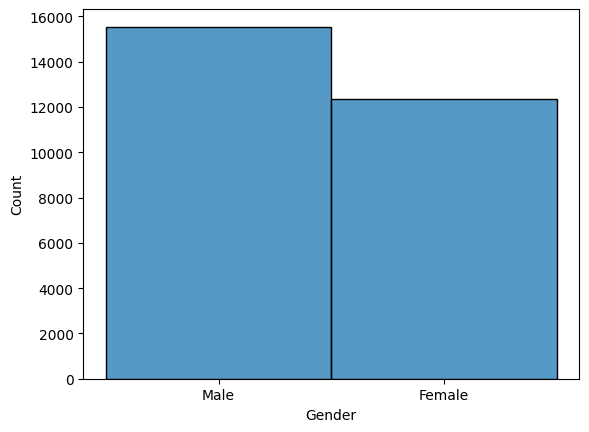

In [7]:
sns.histplot(df["Gender"])
plt.show()

Gender - бінарна змінна, що має майже рівномірний розподіл.

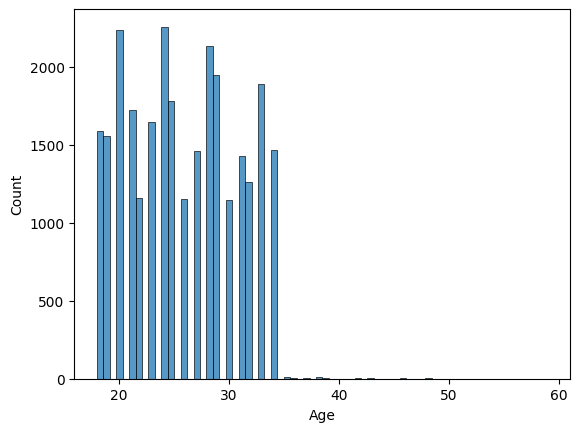

In [8]:
sns.histplot(df["Age"])
plt.show()

З графіку видно, що варто прибрати ті елементи, що мають вік більше 35 аби уникнути дизбалансу.

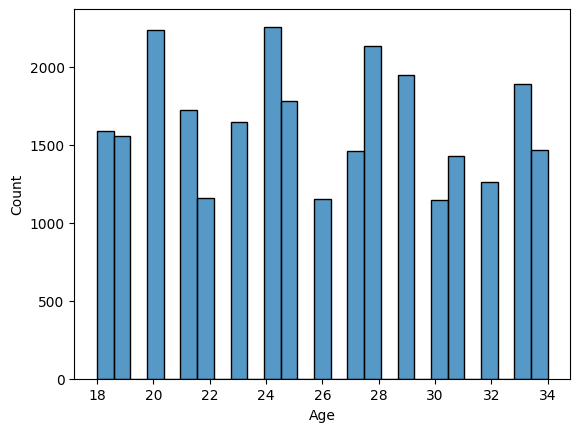

In [9]:
sns.histplot(df[df["Age"]<35]["Age"])
plt.show()

In [10]:
df["Profession"].value_counts()

,count
Profession,
Student,27870
Architect,8
Teacher,6
Digital Marketer,3
Content Writer,2
Chef,2
Doctor,2
Pharmacist,2
Civil Engineer,1


Profession варто все ж прибрати, але спочатку необхідно залишити одних студентів, а вже потім видаляти.

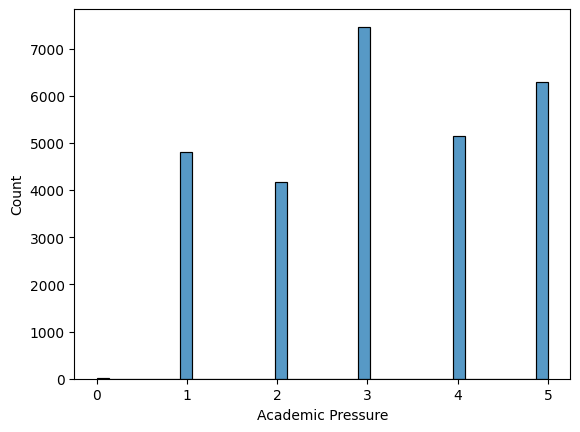

In [11]:
sns.histplot(df["Academic Pressure"])
plt.show()

Треба видалити всі рядки, що мають Academic Pressure = 0, для уникнення дизбалансу.

In [12]:
df[["Work Pressure", "Job Satisfaction"]].value_counts()

Work Pressure  Job Satisfaction
0.0            0.0                 27893
               2.0                     3
5.0            4.0                     2
0.0            1.0                     1
               3.0                     1
2.0            1.0                     1
Name: count, dtype: int64

Гіпотези стосовно Work Pressure та Job Satisfaction справдились, тому ці змінні необхідно видалити.

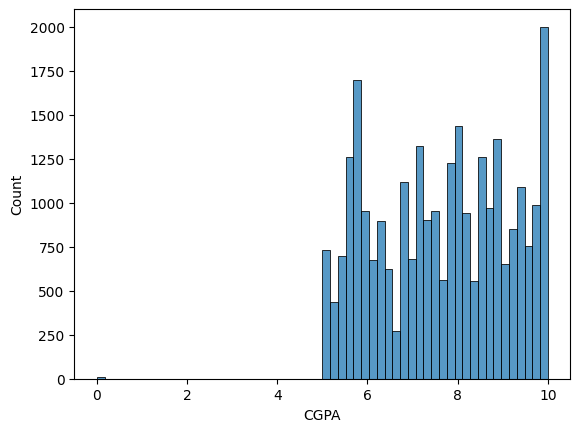

In [13]:
sns.histplot(df["CGPA"])
plt.show()

З графіку розподуло CGPA видно нерівномірний розподіл. Для роботи залишимо лише CGPA > 5 для уникнення дизбалансу.

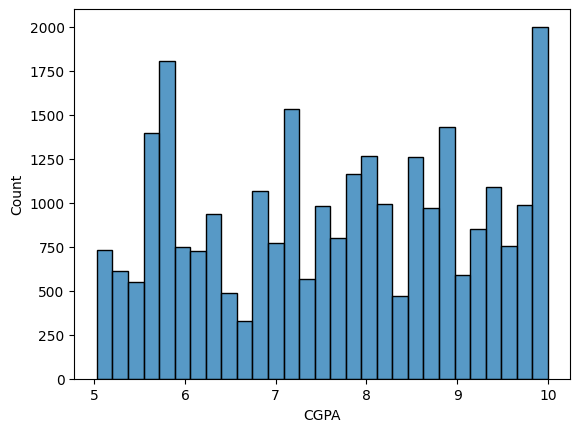

In [14]:
sns.histplot(df[df["CGPA"]>5]["CGPA"])
plt.show()

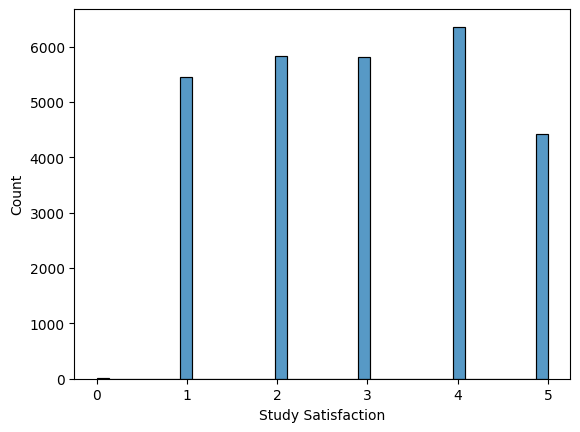

In [15]:
sns.histplot(df["Study Satisfaction"])
plt.show()

Нуобхідно видалити ті рядки, де Study Satisfaction = 0.

In [16]:
df["Sleep Duration"].value_counts()

,count
Sleep Duration,
Less than 5 hours,8310
7-8 hours,7346
5-6 hours,6183
More than 8 hours,6044
Others,18


Змінну Sleep Duration необхідно перетворити у чисельний тип, а рядки, що мають Sleep Duration = "Others" - видалити.

In [17]:
df["Dietary Habits"].value_counts()

,count
Dietary Habits,
Unhealthy,10317
Moderate,9921
Healthy,7651
Others,12


Змінну Dietary Habits необхідно закодувати, а рядки, що мають Dietary Habits = "Others" - видалити.

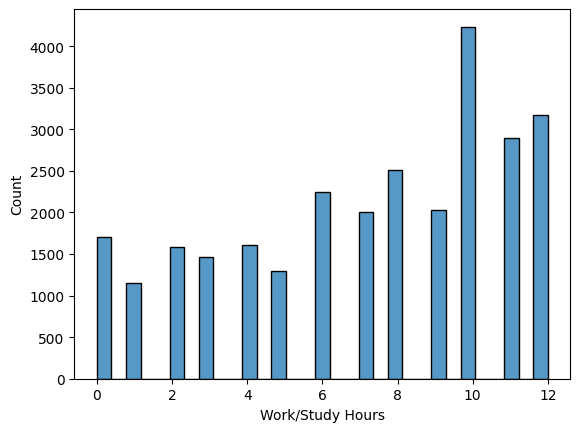

In [18]:
sns.histplot(df["Work/Study Hours"])
plt.show()

Змінну Work/Study Hours залишаємо такою як є, оскільки вона не має викидів.

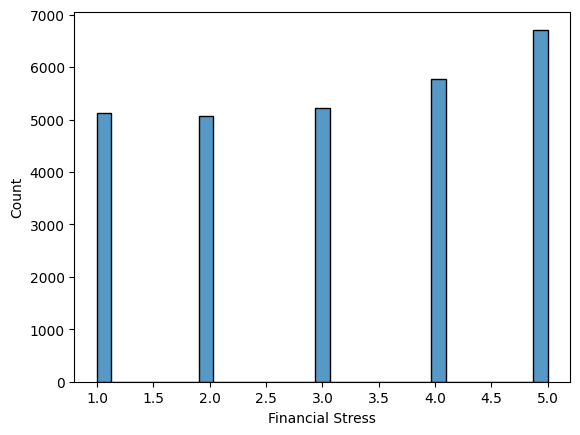

In [19]:
sns.histplot(df["Financial Stress"])
plt.show()

Змінну Financial Stress залишаємо такою як є, оскільки вона не має викидів. Пам'ятаємо, що вона має значення NaN, які варто видалити.

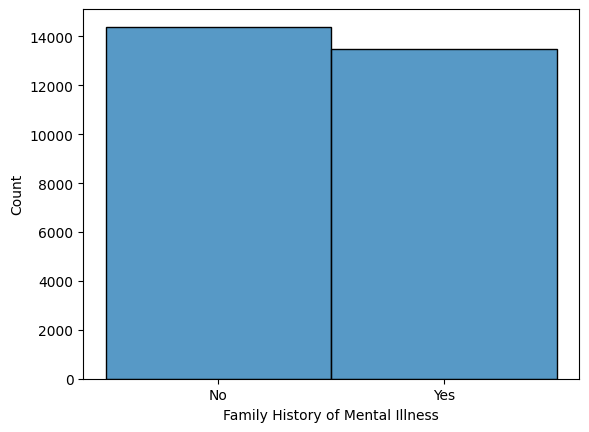

In [20]:
sns.histplot(df["Family History of Mental Illness"])
plt.show()

Змінна Family History of Mental Illness є бінарною та має рівномірний розподіл, тому залишаємо як є.

Отже, ми проаналізували кожну змінну, тому варто зараз видалити непотрібні рядки та стовпці за тими критеріями, що були оголошені раніше.

In [21]:
# Прибираємо NaN значення
df = df.dropna()
# Вводимо обмеження на змінні
df = df[(df["Age"]<35) &
        (df["Profession"]=="Student") &
        (df["Academic Pressure"]!=0) &
        (df["CGPA"]>5) &
        (df["Study Satisfaction"]>0) &
        (df["Sleep Duration"]!="Others") &
        (df["Dietary Habits"]!="Others")]
# Прибираємо зайві змінні
df = df.drop(columns=["id", "City", "Profession", "Work Pressure", "Job Satisfaction",  "Degree", "Have you ever had suicidal thoughts ?", "Depression"])
# Виведення розмірності датасету
print(f"df shape: {df.shape}")
# Виведення перших п'яти елементів
df.head()

df shape: (27776, 10)


,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,Male,33.0,5.0,8.97,2.0,5-6 hours,Healthy,3.0,1.0,No
1,Female,24.0,2.0,5.90,5.0,5-6 hours,Moderate,3.0,2.0,Yes
2,Male,31.0,3.0,7.03,5.0,Less than 5 hours,Healthy,9.0,1.0,Yes
3,Female,28.0,3.0,5.59,2.0,7-8 hours,Moderate,4.0,5.0,Yes
4,Female,25.0,4.0,8.13,3.0,5-6 hours,Moderate,1.0,1.0,No


Тепер, маємо розмірність набору даних: (27776, 10). Числові змінні мають більш-менш рівномірний розподіл, який, головне - не має викидів.

Наступним етапом варто перевести категоріальні змінні у числовий формат:

* Gender - бінарна змінна, тому використаємо Dummy Encoding, де Male - 1, Female - 0;

* Sleep Duration - використаємо Label Encoding, де Less than 5 hours - 4.5, 5-6 hours - 5.5, 7-8 hours - 7.5 та More than 8 hours	- 8.5;

* Dietary Habits - використаємо Ordinal Encoding, де Unhealthy - 0, Moderate - 1, Healthy - 2;

* Family History of Mental Illness - бінарна змінна, тому використаємо Dummy Encoding, де Yes - 1, No - 0.

In [22]:
# Gender encoding by Dummy Encoding
df["Gender"] = np.where(df["Gender"]=="Male", 1, 0)
# Sleep Duration encoding by Ordinal Encoding
sleep_mapping = {
    "Less than 5 hours": 4.5,
    "5-6 hours": 5.5,
    "7-8 hours": 6.5,
    "More than 8 hours": 8.5
}
df['Sleep Duration'] = df['Sleep Duration'].map(sleep_mapping)
# Dietary Habits encoding by Ordinal Encoding
encoder = OrdinalEncoder(categories = [["Unhealthy", "Moderate", "Healthy"]])
df["Dietary Habits"] = encoder.fit_transform(df[['Dietary Habits']])
# Family Mental Illness encoding by Dummy Encoding
df["Family Mental Illness"] = np.where(df["Family History of Mental Illness"]=="Yes", 1, 0)

df = df.drop(columns=["Family History of Mental Illness"])

# Виведення розмірності датасету
print(f"df shape: {df.shape}")
# Виведення перших п'яти елементів
df.head()

df shape: (27776, 10)


,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Work/Study Hours,Financial Stress,Family Mental Illness
0,1,33.0,5.0,8.97,2.0,5.5,2.0,3.0,1.0,0
1,0,24.0,2.0,5.90,5.0,5.5,1.0,3.0,2.0,1
2,1,31.0,3.0,7.03,5.0,4.5,2.0,9.0,1.0,1
3,0,28.0,3.0,5.59,2.0,6.5,1.0,4.0,5.0,1
4,0,25.0,4.0,8.13,3.0,5.5,1.0,1.0,1.0,0


Зараз ми маємо лише числові типи даних, де кількість елементів - 27776. Для спрощення розрахунків зменшимо кількість, але розподіли залишимо такими же. Це має зберігти структуру даних, а обчислювальні ресурси зменшити.

Наступним кроком карто зменшити кількість елементів, зберігаючи при цьому розподіл даних. Зробимо це за допомогою метода стратифікованої вибірки (stratified sampling) з використанням дискретизації безперервних змінних для утворення страт.

Візуалізуємо розподіли, що має наша вибірка зараз:

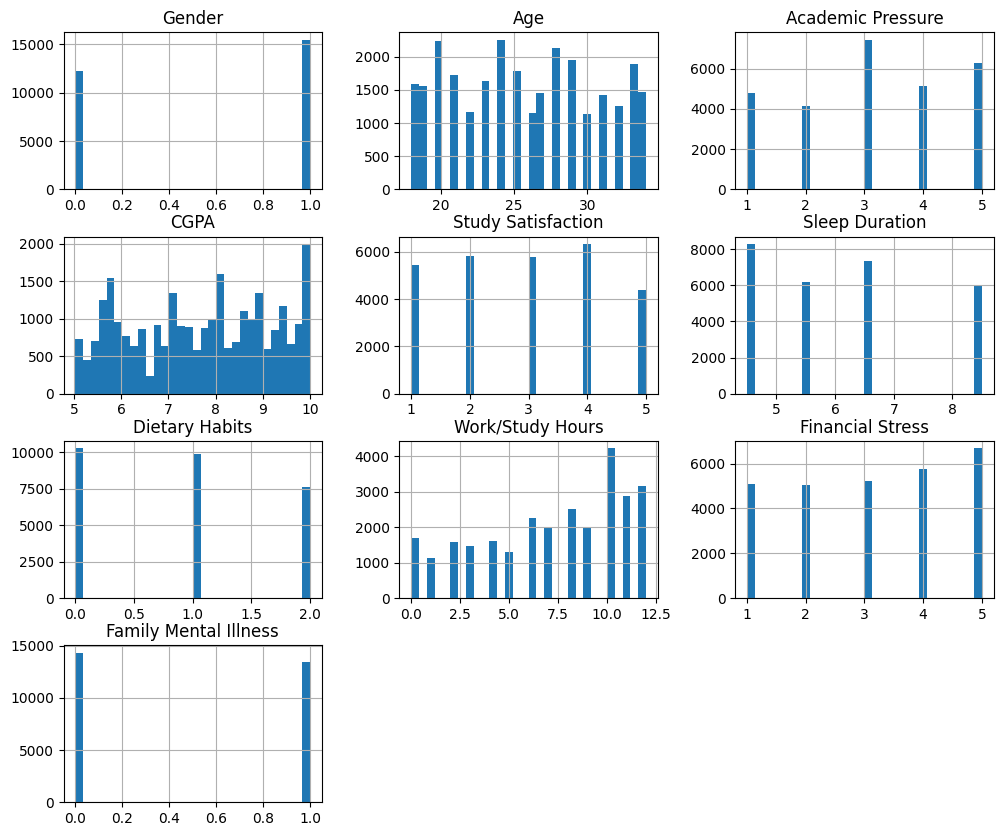

In [23]:
df.hist(bins=30, figsize=(12, 10))
plt.show()

Виконаємо стратифікацію та переглянемо утворені розподіли:

stratified sample shape: (480, 10)


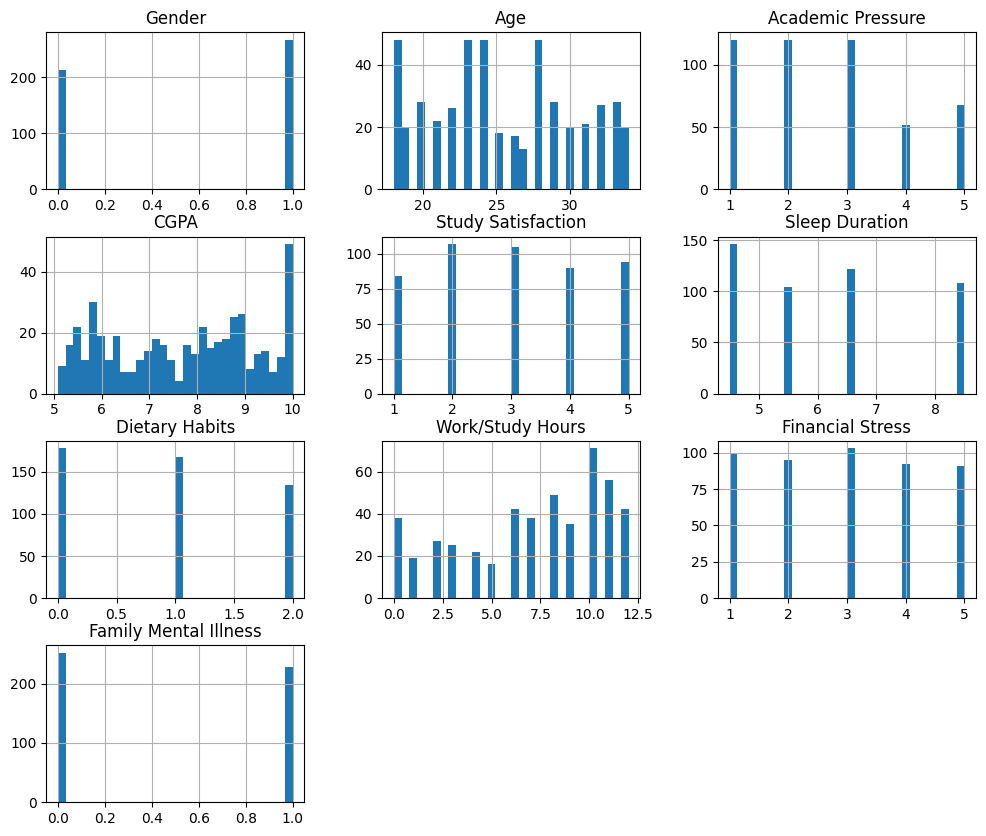

In [24]:
binning = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
binned_features = binning.fit_transform(df)
df['strata'] = (binned_features[:, 0] * 100 + binned_features[:, 1] * 10 + binned_features[:, 2]).astype(int)
sample_size = 500
stratified_sample = df.groupby('strata').apply(lambda x: x.sample(min(len(x), sample_size // len(df['strata'].unique())),random_state=49))

stratified_sample = stratified_sample.reset_index(drop=True).drop(columns=['strata'])

# Виведення розмірності датасету
print(f"stratified sample shape: {stratified_sample.shape}")

stratified_sample.hist(bins=30, figsize=(12, 10))
plt.show()

Отже, розподіли збережені та тепер маємо розмірність даних (480, 10).

Переходимо до візуалізації та підготовки даних до кластеризації.

# Visualization

Побудуємо матрицю взаємної інформації, щоб проаналізувати, чи мають дані лінійні чи нелінійні зв'язки:

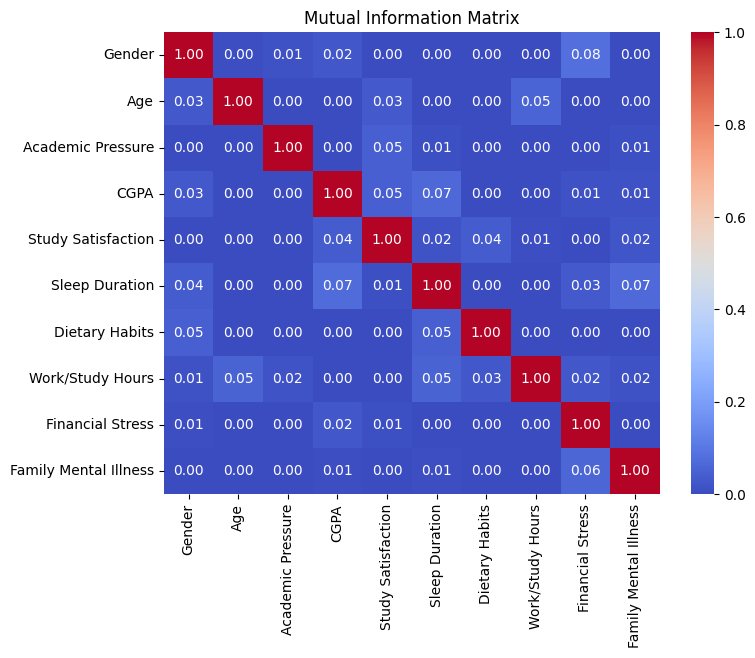

In [25]:
def mutual_info_matrix(df):
    n = len(df.columns)
    mutual_info = np.zeros((n, n))

    for i in range(n):
        for j in range(n):
            if i == j:
                mutual_info[i, j] = 1.0
            else:
                mutual_info[i, j] = mutual_info_regression(df.iloc[:, [i]], df.iloc[:, j])[0]

    return mutual_info


mutual_info_df = pd.DataFrame(mutual_info_matrix(stratified_sample), index=stratified_sample.columns, columns=stratified_sample.columns)
plt.figure(figsize=(8, 6))
sns.heatmap(mutual_info_df, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Mutual Information Matrix")
plt.show()

Маємо доволі низькі значення взаємної інформації, що каже про відсутність зв'язків між атрибутами.

Побудуємо також матрицю кореляції, щоб окремо проаналізувати лінійні зв'язки:

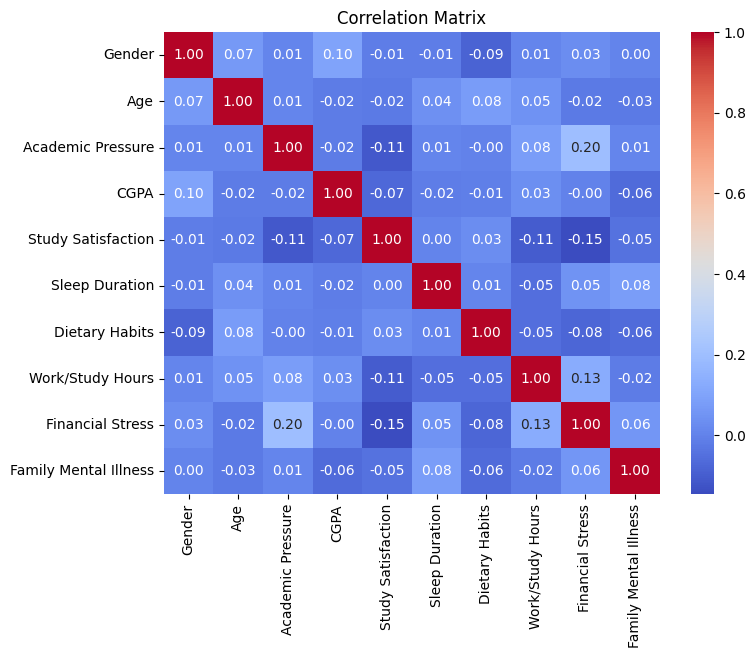

In [26]:
correlation_matrix = stratified_sample.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix")
plt.show()

Як можна побачити з матриці кореляцій, лінійні зв'язки відсутні, що й треба було нам.

Наступним кроком варто зменшити розмірність нашого набору даних до 2-3 компонент, використовуючи методи PCA чи t-SNE. Але ці методи дуже чутливі до масштабування, тому перед цим варто привести дані до рівного масштабу. Зробимо це за допомогою Стандартної нормалізації:

Normalization

In [27]:
# Застосування Стандартної нормалізації
scaler = StandardScaler()
normalized_data = scaler.fit_transform(stratified_sample)
normalized_df = pd.DataFrame(normalized_data, columns=stratified_sample.columns)
# Виведемо інформацію про датасет
normalized_df.describe()

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Work/Study Hours,Financial Stress,Family Mental Illness
count,4.800000e+02,4.800000e+02,4.800000e+02,4.800000e+02,4.800000e+02,4.800000e+02,4.800000e+02,4.800000e+02,4.800000e+02,4.800000e+02
mean,-1.036208e-16,5.921189e-17,5.921189e-17,-1.813364e-16,-4.070818e-17,2.220446e-17,5.181041e-17,9.251859e-17,6.476301e-18,3.330669e-17
std,1.001043e+00,1.001043e+00,1.001043e+00,1.001043e+00,1.001043e+00,1.001043e+00,1.001043e+00,1.001043e+00,1.001043e+00,1.001043e+00
min,-1.119608e+00,-1.524035e+00,-1.224784e+00,-1.732632e+00,-1.457902e+00,-1.097395e+00,-1.134003e+00,-1.879928e+00,-1.396261e+00,-9.511897e-01
25%,-1.119608e+00,-7.048449e-01,-6.652382e-01,-9.519407e-01,-7.312217e-01,-1.097395e+00,-1.134003e+00,-8.091890e-01,-6.840342e-01,-9.511897e-01
50%,8.931701e-01,-1.928510e-01,-1.056920e-01,1.023268e-01,-4.541749e-03,-4.220750e-01,1.144406e-01,2.615504e-01,2.819230e-02,-9.511897e-01
75%,8.931701e-01,7.287379e-01,4.538541e-01,8.229653e-01,7.221382e-01,2.532450e-01,1.362884e+00,7.969201e-01,7.404188e-01,1.051315e+00
max,8.931701e-01,1.752726e+00,1.759462e+00,1.550276e+00,1.448818e+00,1.603885e+00,1.362884e+00,1.332290e+00,1.452645e+00,1.051315e+00


Бачимо, що дані нормалізовані, тому тепер можна перейти до використання методів зменшення розмірності. Почнемо з PCA алгоритму (методу головних компонент)

# Applying PCA method

Спочатку, варто обрати кількість компонент, а для цього необхідно проаналізувати дисперсії, що "пояснює" кожна компонента

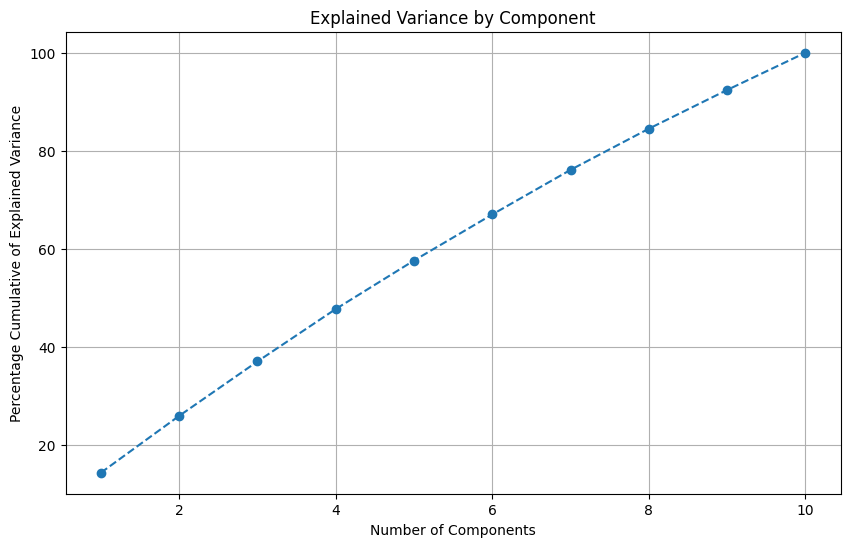

In [28]:
pca = PCA()
pca.fit(normalized_data)
per_var = np.round(pca.explained_variance_ratio_*100, decimals = 1)

plt.figure(figsize = (10,6))
plt.plot(range(1, len(per_var)+1), per_var.cumsum(), marker = "o", linestyle = "--")
plt.grid()
plt.ylabel("Percentage Cumulative of Explained Variance")
plt.xlabel("Number of Components")
plt.title("Explained Variance by Component")
plt.show()

Бачимо дуже погану картину, а саме те, що необхідні 90% інформації закладені в 9-10 компонентах. Суттєвого зменшення таким чином ми досягти, на жаль, не можемо.

Такі результати свідчать про те, що


1.   У початкових даних кожна ознака, ймовірно, містить приблизно однаковий рівень інформації (дисперсії). Тому жодна з головних компонент не виділяється значною часткою дисперсії.
2.   PCA виділяє компоненти, які найбільше пояснюють дисперсію. Якщо ознаки початкових даних слабко корельовані між собою, PCA розподіляє дисперсію рівномірно.
3.   Кількість головних компонент відповідає кількості початкових ознак. У такому випадку всі компоненти рівномірно пояснюють внесок у загальну дисперсію.


Для інтересу, провізуалізуємо дані, представлені 2 компонентами

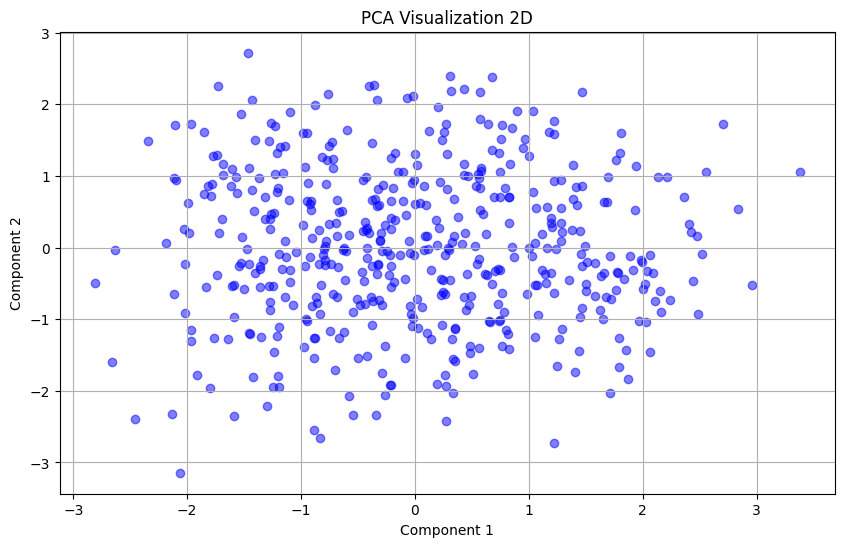

In [29]:
pca = PCA(n_components=2)
res_pca = pca.fit_transform(normalized_data)
df_pca = pd.DataFrame(res_pca)

plt.figure(figsize=(10, 6))
plt.scatter(res_pca[:, 0], res_pca[:, 1], c='blue', alpha=0.5)
plt.title('PCA Visualization 2D')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.grid(True)
plt.show()

Як можна побачити, дані ніяким чином не можна згрупувати у групи. Представлення більшою кількістю компонент не має сенсу, оскільки пояснена дисперсія залишається малою.

# Applying t-SNE method

Для того, щоб проаналізувати більш складні зв'язки, необхідно використати t-SNE метод. Зробимо це одразу для 2-ух компонент, оскільки метод t-SNE не має способу представлення якості розбиття.

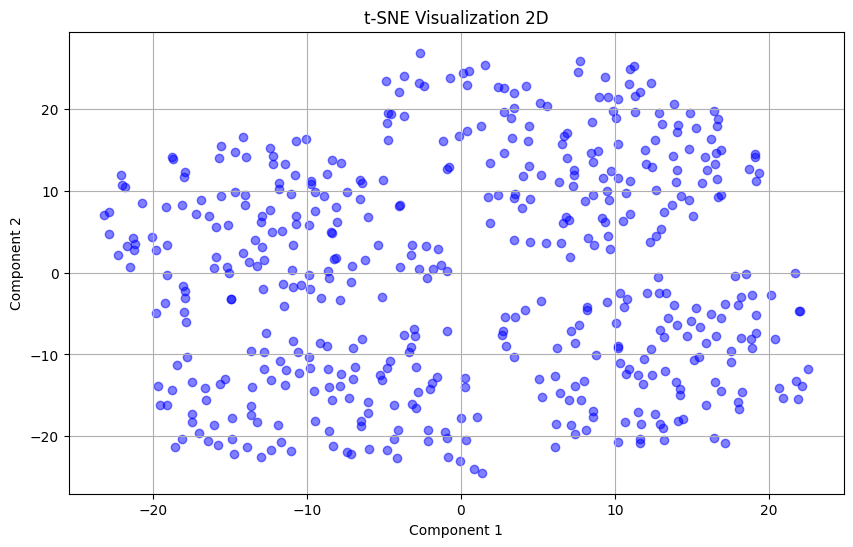

In [30]:
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_results = tsne.fit_transform(normalized_data)

plt.figure(figsize=(10, 6))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c='blue', alpha=0.5)
plt.title('t-SNE Visualization 2D')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.grid(True)
plt.show()

З отриманого графіку бачимо чітко виражені групи об'єктів, а це каже про те, що кількість компонент 2 є задовільною.

Візуально можемо оцінити 4 кластери, але потрібно більш детальний аналіз.

# Кластеризація

# Distance-based clustering


Для демонстрації Distance-based кластеризації, було обрано базовий метод k-means.

Для того, щоб цей метод використати, необхідно визначити кількість кластерів. Орієнтовно їх 4, але за допомогою метода ліктя (Elbow method) дізнаємось точне значення.

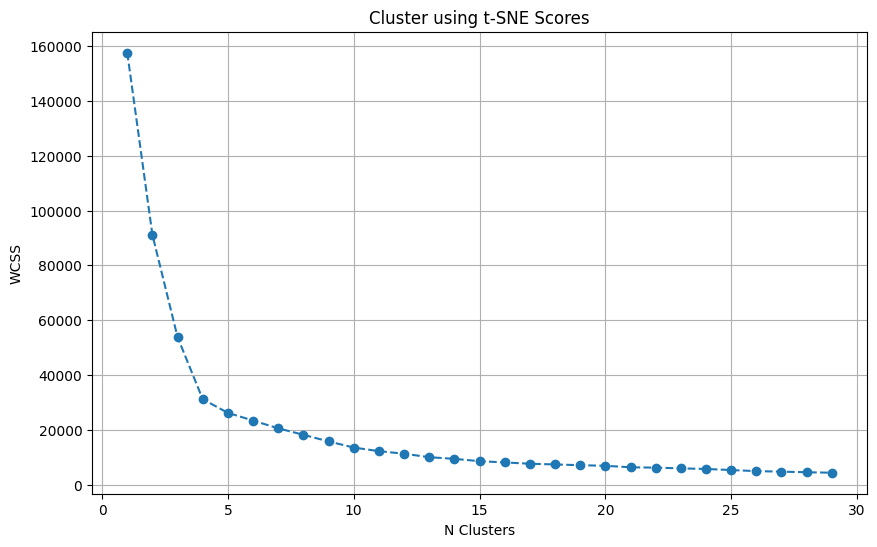

In [31]:
WCSS = []

for i in range(1,30):
    kmeans = KMeans(n_clusters = i, init = "k-means++", random_state = 42)
    kmeans.fit(tsne_results)
    WCSS.append(kmeans.inertia_)

plt.figure(figsize = (10,6))
plt.plot(range(1,30), WCSS, marker = "o", linestyle = "--")
plt.grid()
plt.title("Cluster using t-SNE Scores")
plt.ylabel("WCSS")
plt.xlabel("N Clusters")
plt.show()

З наведеного графіку можна чітко побачити перехід після 4-го кластеру. Для уточнення, підрахуємо Silhouette score для кожної кількості кластерів.

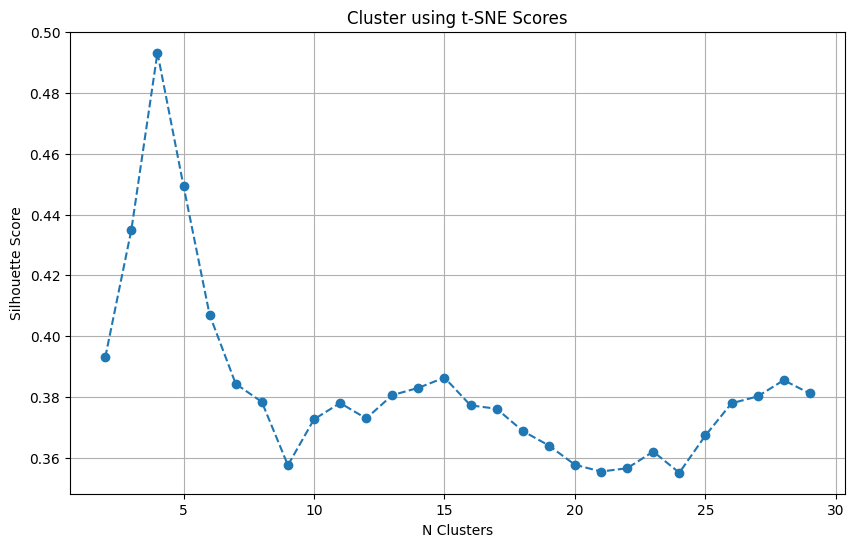

In [32]:
silhouette_scores = []

for n_clusters in range(2,30):
    kmeans_pca = KMeans(n_clusters = n_clusters, init = "k-means++", random_state = 42)
    labels = kmeans_pca.fit_predict(tsne_results)
    silhouette_avg = silhouette_score(tsne_results, labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize = (10,6))
plt.plot(range(2,30), silhouette_scores, marker = "o", linestyle = "--")
plt.grid()
plt.title("Cluster using t-SNE Scores")
plt.ylabel("Silhouette Score")
plt.xlabel("N Clusters")
plt.show()

Очевидно, кількість кластерів = 4, що було визначено напередодні. Скористаємось методом KMeans та провізуалізуємо результати.

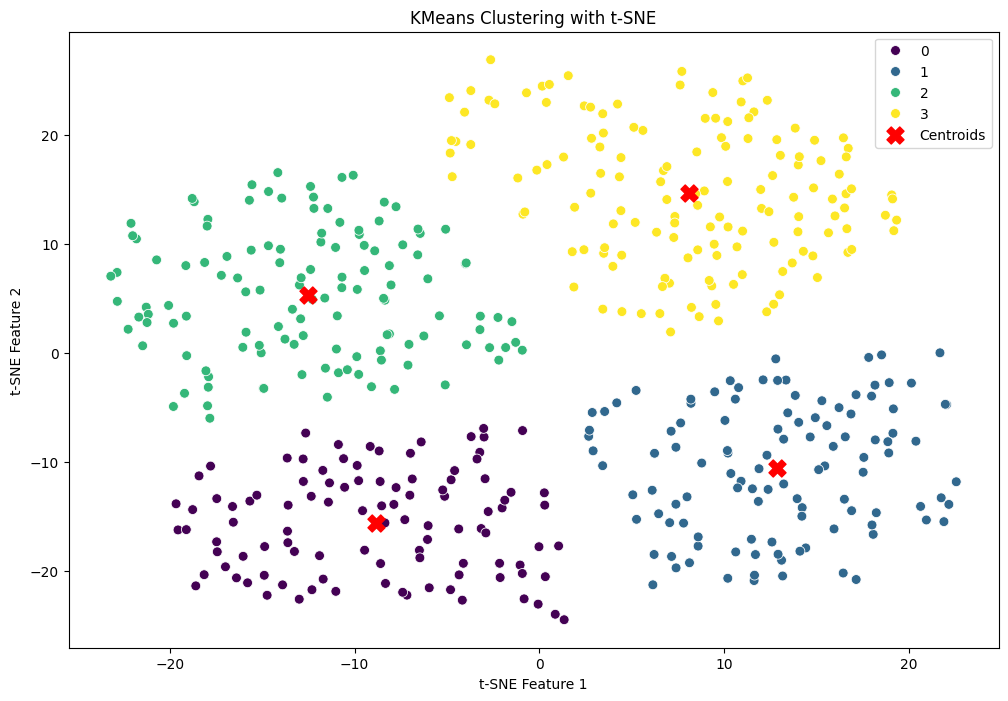

In [33]:
kmeans = KMeans(n_clusters = 4, init = "k-means++", random_state = 42)
kmeans.fit(tsne_results)

labels = kmeans.labels_

plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=tsne_results[:, 0],
    y=tsne_results[:, 1],
    hue=labels,
    palette='viridis',
    legend='full',
    s=50
)

centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    c='red',
    marker='X',
    s=150,
    label='Centroids'
)

plt.title('KMeans Clustering with t-SNE')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.legend()
plt.show()

Візуально бачимо, що кластери виглядають чітко розмежованими, що свідчить про добру кластеризацію після застосування KMeans.

Центроїди знаходяться близько до центрів своїх кластерів, що також свідчить про якісну кластеризацію.

In [34]:
normalized_df['t-SNE Feature 1'] = tsne_results[:, 0]
normalized_df['t-SNE Feature 2'] = tsne_results[:, 1]
normalized_df['Cluster'] = kmeans.fit_predict(tsne_results)
stratified_sample['Cluster'] = normalized_df['Cluster']
stratified_sample.head()

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Work/Study Hours,Financial Stress,Family Mental Illness,Cluster
0,1,18.0,1.0,9.78,3.0,4.5,0.0,1.0,2.0,0,3
1,0,18.0,1.0,7.74,4.0,8.5,1.0,4.0,3.0,1,0
2,1,18.0,1.0,7.25,1.0,6.5,0.0,8.0,4.0,1,2
3,0,18.0,1.0,7.82,2.0,8.5,0.0,6.0,1.0,0,1
4,1,18.0,1.0,6.08,5.0,5.5,0.0,7.0,1.0,1,2


In [35]:
features = ["Gender", "Age", "Academic Pressure", "CGPA", "Study Satisfaction",
            "Sleep Duration", "Dietary Habits", "Work/Study Hours",
            "Financial Stress", "Family Mental Illness"]
cluster_means = pd.DataFrame(stratified_sample.groupby('Cluster')[features].mean())
cluster_std = pd.DataFrame(stratified_sample.groupby('Cluster')[features].std())

cluster_means

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Work/Study Hours,Financial Stress,Family Mental Illness
Cluster,,,,,,,,,,
0,0.029126,24.941748,2.543689,7.540680,2.932039,6.393204,0.970874,6.184466,2.815534,0.990291
1,0.000000,25.196429,2.687500,7.457589,3.107143,5.964286,1.008929,7.580357,2.937500,0.017857
2,1.000000,25.532258,2.741935,7.630726,2.895161,6.153226,0.758065,7.572581,3.217742,1.000000
3,0.992908,25.921986,2.588652,7.990355,3.078014,6.031915,0.914894,6.709220,2.858156,0.000000


З наведеної таблиці видно, що значні зміни відбуваються у таких атрибутів як Gender та Family Mental Illness. Інші атрибути суттєвих змін відносно кластерів не мають.

Охарактеризуємо кожний кластер:

*   У перший кластер з індексом 0 потрапили жінки, що мають ментальні захворювання в історії їх родин. Хоча не суттєво, але мають менше годин на навчальний процес. Всі інші показники середньостатистичні.
*   У другий кластер потрапили жінки, що НЕ мають ментальні захворювання в історії їх родин. Несуттєво, але можна сказати, що вони мають більше задоволення навчанням та більш схильні до корисних звичок у харуванні.
*   У третій кластер попали чоловіки, що мають ментальні захворювання в історії їх родин. Цікаво є те, що вони здебільшого надають перевагу шкідливим звичкам у харуванні, а також несуттєво, але мають менше задоволення навчальним процесом.
*   В останній кластер потрапили  потрапляють чоловіки, які НЕ мають згадувань
ментальних захворювань у їх сімей. Вони мають середні показники в усьому, але несуттєво мають перевагу у середніх оцінках у навчанні.

In [36]:
#Видалимо зайві колонки після аналізу попередньої кластеризації
normalized_df = normalized_df.drop(columns=["t-SNE Feature 1", "t-SNE Feature 2", "Cluster"])
stratified_sample = stratified_sample.drop(columns=["Cluster"])

# Density-based clustering


Перейдемо до Density-based методу кластеризації, а саме було обрано метод DBSCAN.

В якості параметру min_samples обираємо 4, за правилом min_samples=2*D, де D - розмірність (в нашому випадку розмірність 2 - наші компоненти t-SNE).

Параметр Епсілон (eps) корегуємо для отримання кращого результату.

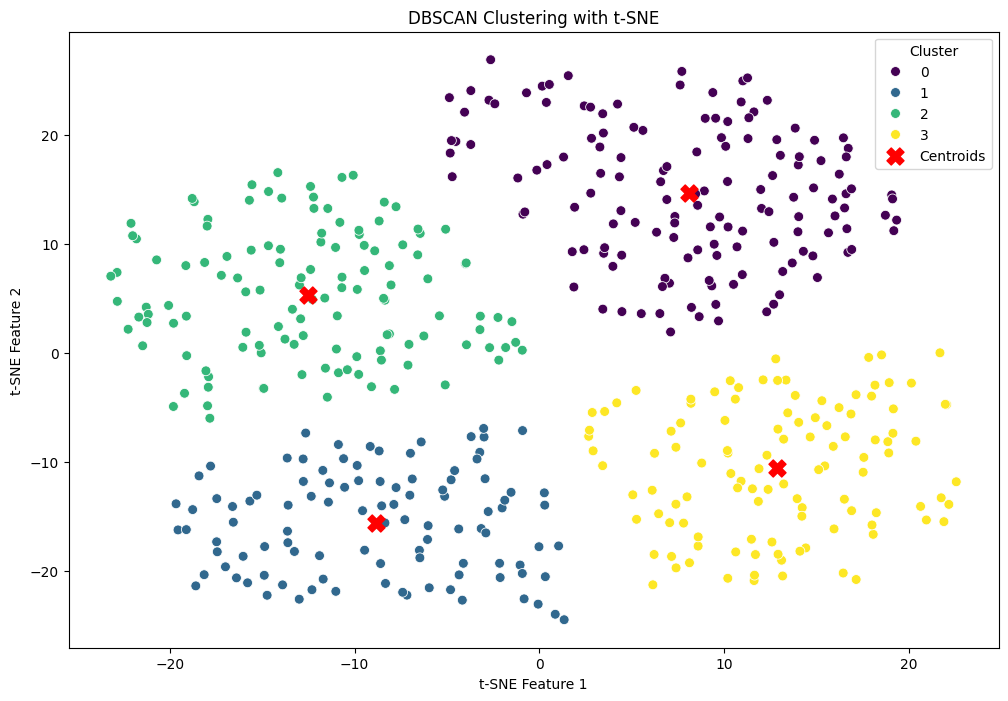

In [37]:
dbscan = DBSCAN(eps=3.4, min_samples=4)
dbscan.fit(tsne_results)

dbscan_labels = dbscan.labels_

plt.figure(figsize=(12, 8))
sns.scatterplot(
    x=tsne_results[:, 0],
    y=tsne_results[:, 1],
    hue=dbscan_labels,
    palette='viridis',
    legend='full',
    s=50
)

unique_labels = set(dbscan_labels)
centroids = []

for label in unique_labels:
    if label != -1:
        cluster_points = tsne_results[dbscan_labels == label]
        cluster_center = cluster_points.mean(axis=0)
        centroids.append(cluster_center)

centroids = np.array(centroids)

plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    c='red',
    marker='X',
    s=150,
    label='Centroids'
)

plt.title('DBSCAN Clustering with t-SNE')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.legend(title='Cluster')
plt.show()

Можна побачити доволі гарне розбиття на кластери, ідентично до KMeans.

In [38]:
normalized_df['t-SNE Feature 1'] = tsne_results[:, 0]
normalized_df['t-SNE Feature 2'] = tsne_results[:, 1]
normalized_df['Cluster'] = dbscan.fit_predict(tsne_results)
stratified_sample['Cluster'] = normalized_df['Cluster']
stratified_sample.head()

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Work/Study Hours,Financial Stress,Family Mental Illness,Cluster
0,1,18.0,1.0,9.78,3.0,4.5,0.0,1.0,2.0,0,0
1,0,18.0,1.0,7.74,4.0,8.5,1.0,4.0,3.0,1,1
2,1,18.0,1.0,7.25,1.0,6.5,0.0,8.0,4.0,1,2
3,0,18.0,1.0,7.82,2.0,8.5,0.0,6.0,1.0,0,3
4,1,18.0,1.0,6.08,5.0,5.5,0.0,7.0,1.0,1,2


In [39]:
features = ["Gender", "Age", "Academic Pressure", "CGPA", "Study Satisfaction",
            "Sleep Duration", "Dietary Habits", "Work/Study Hours",
            "Financial Stress", "Family Mental Illness"]
cluster_means = pd.DataFrame(stratified_sample.groupby('Cluster')[features].mean())
cluster_std = pd.DataFrame(stratified_sample.groupby('Cluster')[features].std())

cluster_means

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Work/Study Hours,Financial Stress,Family Mental Illness
Cluster,,,,,,,,,,
0,0.992908,25.921986,2.588652,7.990355,3.078014,6.031915,0.914894,6.709220,2.858156,0.000000
1,0.029126,24.941748,2.543689,7.540680,2.932039,6.393204,0.970874,6.184466,2.815534,0.990291
2,1.000000,25.532258,2.741935,7.630726,2.895161,6.153226,0.758065,7.572581,3.217742,1.000000
3,0.000000,25.196429,2.687500,7.457589,3.107143,5.964286,1.008929,7.580357,2.937500,0.017857


З отриманих статистичних оцінок видно, що дані абсолютно ідентичні до результатів KMeans. Це не дивно, оскільки обидва методи виконали однакові розбиття на кластери.

In [40]:
#Видалимо зайві колонки після аналізу попередньої кластеризації
normalized_df = normalized_df.drop(columns=["t-SNE Feature 1", "t-SNE Feature 2", "Cluster"])
stratified_sample = stratified_sample.drop(columns=["Cluster"])

# Grid-based clustering

Перейдемо до Grid-based моделі кластеризації. Для цієї задачі був обраний прицнип методу CLIQUE.

Основні гіперпараметри:


*   Розмірність сітки (grid_size)
*   Поріг щільності (density_threshold)

Їх значення знайдемо за допомогою підрахунку найбільшого silhouette score.

In [41]:
intervals = 20
thresholds = 20


params = []
silhouette_scores = []


for interval in range(2, intervals):
    for threshold in range(1, thresholds):

        clique_instance = clique(tsne_results, interval, threshold)

        clique_instance.process()
        clusters = clique_instance.get_clusters()
        noise = clique_instance.get_noise()
        cells = clique_instance.get_cells()

        labels = np.full(len(tsne_results), -1)

        for cluster_idx, cluster in enumerate(clusters):
            for point_idx in cluster:
                labels[point_idx] = cluster_idx

        if len(clusters) > 1:
            silhouette = silhouette_score(tsne_results, labels)
            silhouette_scores.append(silhouette)
            params.append((interval, threshold))


max_score = max(silhouette_scores)
print(f"max silhouette: {max_score}")
print(f"interval: {params[silhouette_scores.index(max_score)][0]}, threshold: {params[silhouette_scores.index(max_score)][1]}")

max silhouette: 0.3583320081233978
interval: 13, threshold: 1


Amount of clusters: 3


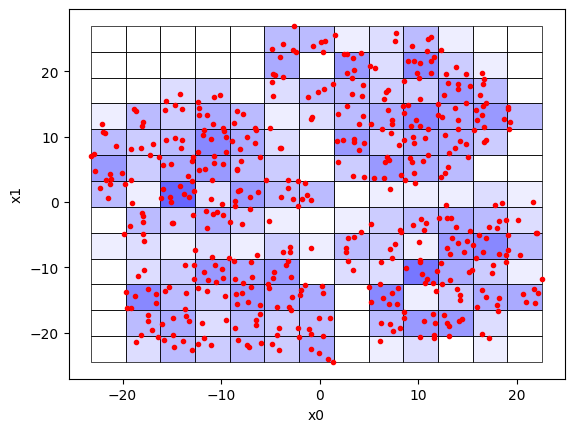

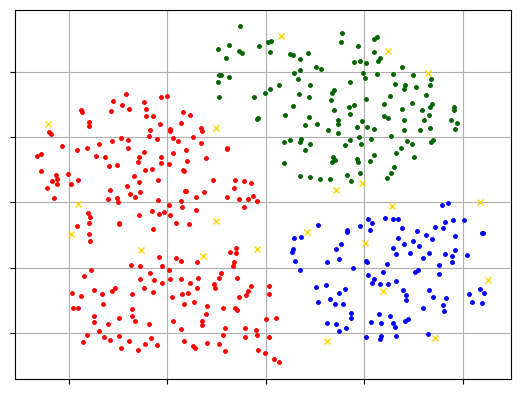

In [42]:
# silhouette = 0.35: 3 clusters
intervals = 13
threshold = 1

clique_instance = clique(tsne_results, intervals, threshold)

clique_instance.process()
clusters = clique_instance.get_clusters()
noise = clique_instance.get_noise()
cells = clique_instance.get_cells()
print("Amount of clusters:", len(clusters))

clique_visualizer.show_grid(cells, tsne_results)
clique_visualizer.show_clusters(tsne_results, clusters, noise)

Далі було виставлено обмеження на кількість кластерів, а саме їх має бути більше 3. Було отримано значення silhouette = 0.33 при 5 кластерах.

Amount of clusters: 5


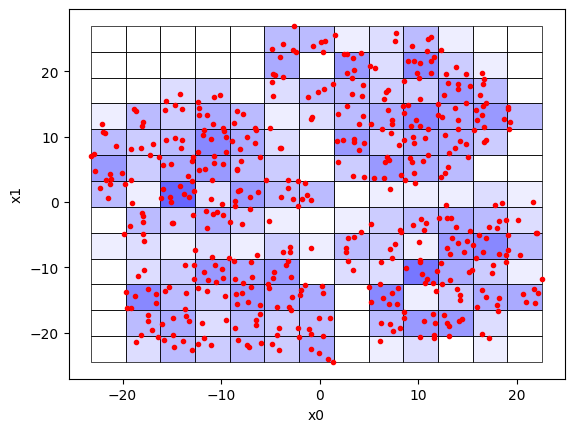

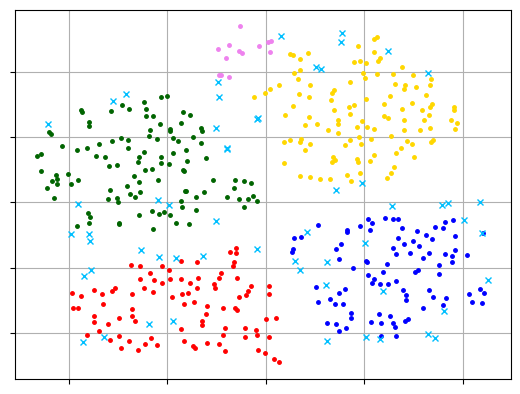

In [43]:
# silhouette = 0.33: 5 clusters
intervals = 13
threshold = 2

clique_instance = clique(tsne_results, intervals, threshold)

clique_instance.process()
clusters = clique_instance.get_clusters()
noise = clique_instance.get_noise()
cells = clique_instance.get_cells()
print("Amount of clusters:", len(clusters))

clique_visualizer.show_grid(cells, tsne_results)
clique_visualizer.show_clusters(tsne_results, clusters, noise)

Останнім кроком поставимо кількість кластверів = 4. Було отримано silhouette =  0.258.

Amount of clusters: 4


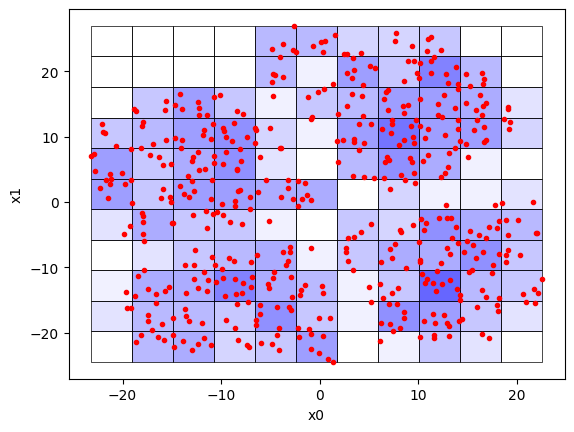

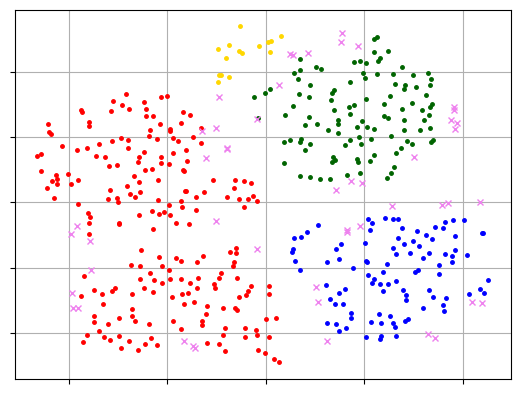

In [44]:
# silhouette =  0.258: 4 clusters
intervals = 11
threshold = 3

clique_instance = clique(tsne_results, intervals, threshold)

clique_instance.process()
clusters = clique_instance.get_clusters()
noise = clique_instance.get_noise()
cells = clique_instance.get_cells()
print("Amount of clusters:", len(clusters))

clique_visualizer.show_grid(cells, tsne_results)
clique_visualizer.show_clusters(tsne_results, clusters, noise)

Поки що, найгіршим методом кластеризації віявився саме Grid-Based метод - CLIQUE, який розбив наші дані на 3 кластери при найкращому значенні silhouette score = 0.35.

Візуальна картина розбиття суттєво відрізняється від попередніх методів, а найкраще значення silhouette score значно менше.

# Model-based clustering

Перейдемо до Model-based кластеризації, а саме візьмемо Gaussian Mixture Model:

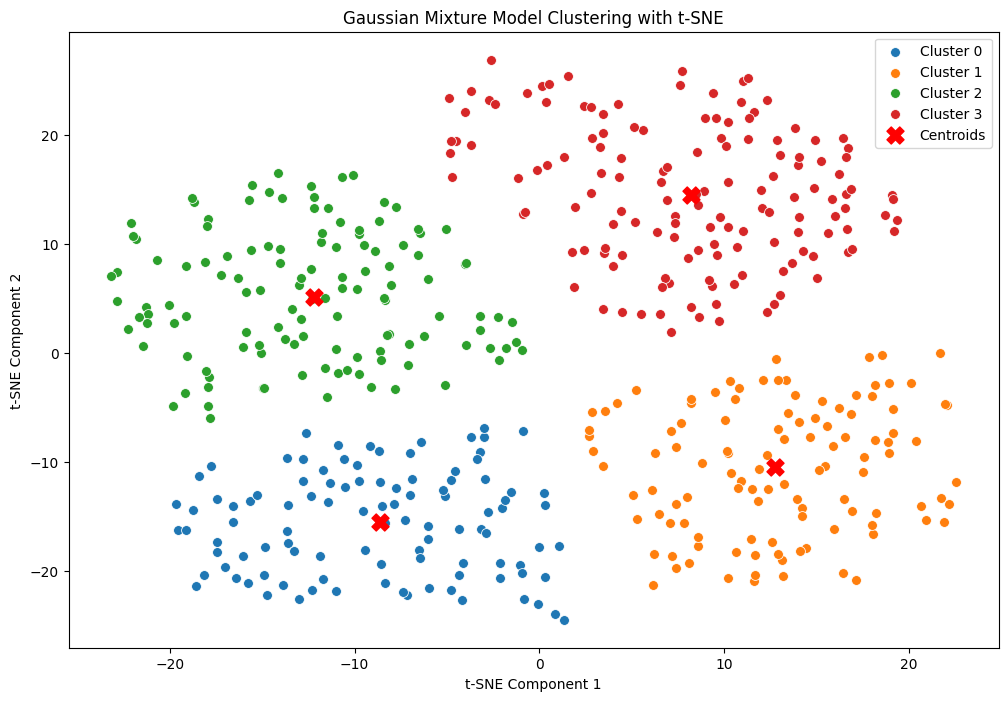

In [45]:
gmm = GaussianMixture(n_components=4, random_state=42)
gmm.fit(tsne_results)
cluster_labels = gmm.predict(tsne_results)

plt.figure(figsize=(12, 8))

for cluster in range(4):
    cluster_points = tsne_results[cluster_labels == cluster]

    sns.scatterplot(x=cluster_points[:, 0], y=cluster_points[:, 1], label=f"Cluster {cluster}", palette='viridis', s=50)

centroids = gmm.means_
plt.scatter(centroids[:, 0], centroids[:, 1], s=150, c='red', marker='X', label="Centroids")

plt.title("Gaussian Mixture Model Clustering with t-SNE")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend()
plt.show()

Методом Gaussian Mixture було отримано розбиття на кластери, ідентичне до розбиттів методами KMeans та DBSCAN. Виходячи з цього, висновки про кластеризацію такі самі, як для KMeans.

# Conclusion

Отже, було досліджено різні моделі кластеризації, а саме Distance-based clustering - KMeans, Density-based - DBSCAN, Grid-based - CLIQUE та Model-based - Gaussian Mixture Model.

Найефективнішими моделями стали: KMeans, DBSCAN та Gaussian Mixture Model. Всі вони мають ідентичний результат. Найгіршою моделлю (для нашого набору даних), став CLIQUE, який має значно гірший результат за інші методи.

Загалом, ми маємо справу з опуклими кластерами простої форми, тому найпростіший метод KMeans має чудові результати. Метод Gaussian Mixture Model також виявився доволі простим у реалізації та доволі ефективним. Складнішою моделлю є DBSCAN, адже потребує чутливе налаштування гіперпараметрів, від яких залежить результат. Але при цьому, він зробив правильну та чітку кластеризацію. CLIQUE також потребував налаштування гіперпараметрів, але навідміну від DBSCAN, ми не отримали очікуваного результату.

Проаналізувавши результати моделей KMeans, DBSCAN та Gaussian Mixture Model, ми побачили наступні групування об'єктів:

*   У перший кластер з індексом потрапили жінки, що мають ментальні захворювання в історії їх родин. Хоча не суттєво, але мають менше годин на навчальний процес. Всі інші показники середньостатистичні.
*   У другий кластер потрапили жінки, що НЕ мають ментальні захворювання в історії їх родин. Несуттєво, але можна сказати, що вони мають більше задоволення навчанням та більш схильні до корисних звичок у харуванні.
*   У третій кластер попали чоловіки, що мають ментальні захворювання в історії їх родин. Цікаво є те, що вони здебільшого надають перевагу шкідливим звичкам у харуванні, а також несуттєво, але мають менше задоволення навчальним процесом.
*   В останній кластер потрапили  потрапляють чоловіки, які НЕ мають згадувань
ментальних захворювань у їх сімей. Вони мають середні показники в усьому, але несуттєво мають перевагу у середніх оцінках у навчанні.